# Text handler

http://rachelee.org/79

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./en-len.csv", index_col=0)
df = pd.read_csv("./ko-len.csv", index_col=0)

2248


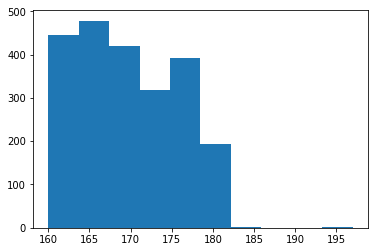

'What I learned most was how to tell a story in 15 seconds or 30 seconds or 60 seconds - to have some kind of goal of what to try to do and make it happen in that time.'

In [12]:
speechs = pd.read_pickle("./en-speech-final")
# speechs = sum([s.split(".") for s in speechs], [])
# speechs = list(set(speechs)-{""})
se = pd.Series([len(s) for s in speechs])
# se = se[se > 50]
# se = se[se < 85]
print(len(se))
plt.hist(se)
plt.show()

speechs[0]

In [5]:
44032
21
28
588

588

508


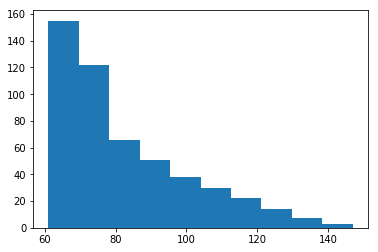

In [21]:
speechs = pd.read_pickle("./ko-speech-final")
se = pd.Series([len(s) for s in speechs])
se = se[se > 60]
print(len(se))
plt.hist(se)
plt.show()

In [ ]:
def check_redundance(a, b):
    l = max(len(a), len(b))
    a += "_"*l
    a = a[:l]
    b += "_"*l
    b = b[:l]
    comparing = np.array(list(a)) == np.array(list(b))
    return True if comparing.sum()/l > 0.8 else False


def en_preprocess(speech):
    speech = re.sub("%", "percent", speech)
    speech = re.sub("\\\\", "", speech)
    dollars = re.compile("\$\w+").findall(speech)
    for s in dollars:
        speech = speech.replace(s, s[1:]+" dollar")
    return speech


def ko_preprocess(speech):
    speech = re.sub("\[.*\]|\(.*\)", "", speech).replace("%", "퍼센트")
    speech = re.sub("[^가-힣0-9\s\.,]", "", speech)
    speech = " ".join(speech.split())
    return speech


en_speechs = pd.read_pickle("en-speech-base")
en_speechs = [en_preprocess(speech) for speech in en_speechs]
pd.to_pickle(en_speechs, "en-speech-final")

ko_speechs = pd.read_pickle("ko-speech-base")
ko_speechs = [ko_preprocess(speech) for speech in ko_speechs]
pd.to_pickle(ko_speechs, "ko-speech-final")

In [ ]:
sys.path.append(os.environ["SEOHASONG_LIBRARY"])
from dic_to import arrdic2xml


def set_test(seed_key, n_test, n_sample, texts, experiment, name):

    def get_arrdic(arr):
        arrdic = [
            {"configure": [
                {"experiment name='"+experiment+"-"+name+"'": [
                    {"challenge type='"+experiment+"'": text}
                    for text in arr
                ]}
            ]}
        ]
        return arrdic
    
#     seed = int(hashlib.sha1(seed_key.encode("utf8")).hexdigest()[10], 16)
#     np.random.seed(seed)
#     arrs = [np.random.choice(texts, n_sample) for i in range(n_test)]

    arrdic = get_arrdic(texts)
    bs = arrdic2xml.convert(arrdic)
    with open("./config.xml", "w") as f:
        f.write(str(bs))

# ko_speechs = pd.read_pickle("./ko-speech-final")
# en_speechs = pd.read_pickle("./en-speech-final")
# set_test("송서하", 4, 100, ko_speechs, "keyboard", "ko")
# set_test("송서하", 4, 100, en_speechs, "keyboard", "en")

patterns = pd.read_pickle("./pattern-final")
bs = set_test("송서하", 1, 0, patterns, "pattern", "beta")